In [1]:
import os
os.chdir("/content/drive/MyDrive/Machine Learning Projects/White Wine Quality")

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

## Problem Definition

Develop a machine learning model to classify the quality of white wine based on relevant features, aiming to predict whether a given sample is of low, medium, or high quality.

## Load Dataset

Yo can download the dataset from [Github page](https://github.com/stedy/Machine-Learning-with-R-datasets) and append the variable for this dataset.

In [3]:
# Load the data from github raw
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv"
wines = pd.read_csv(url)

## Analyze Data

### Descriptive Statistics

We will start off by confirming the dimensions of the dataset, e.g. the number of rows and columns.

In [4]:
# shape
wines.shape

(4898, 12)

We have **4898** instances work with and can confirm the data has **12** attributes including `target` attribute.

In [5]:
# data types
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We can see that all attributes numerical type(mostly `float64`)

In [6]:
# Look at the first 5 rows
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Descriptions
pd.set_option('display.float_format', lambda x: '%.2f' % x)
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.00,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.00,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.00,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.00,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.00,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.00,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.00,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.00,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.00,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.00,0.49,0.11,0.22,0.41,0.47,0.55,1.08


In [8]:
# Target variable distributions
wines.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Target attirbute is imbalanced. We can create sentetic data using special modules from `sklearn` or we can create a new column base on this attribute. But now we don't do anything.

### Unimodal Data Visualizations
Let’s look at visualizations of individual attributes. It is often useful to look at your data
using multiple different visualizations in order to spark ideas. Let’s look at histograms of each
attribute to get a sense of the data distributions.

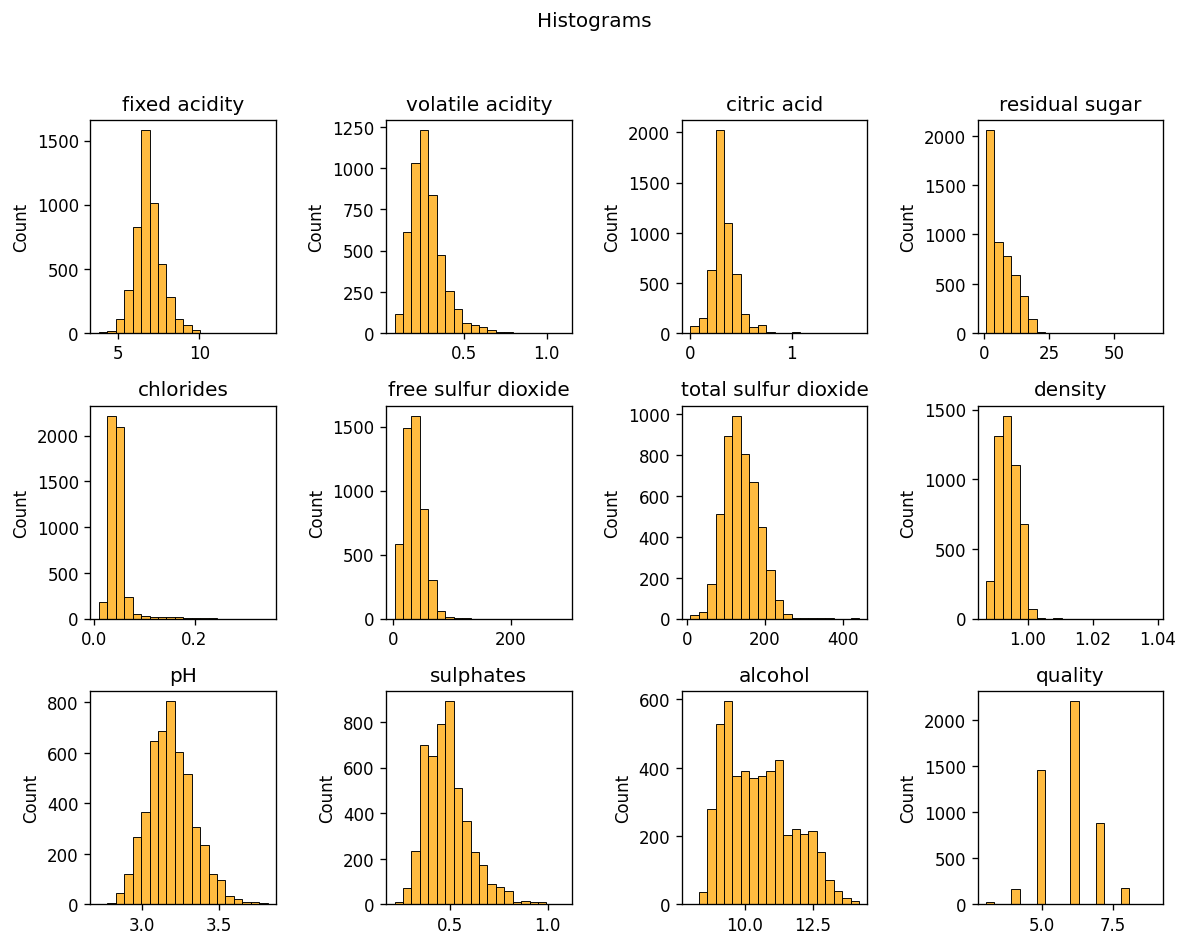

In [9]:
# Define the nrows and ncols
nrows=3
ncols=12

# Histograms
fig, axes = plt.subplots(ncols=(ncols//nrows),nrows=nrows, figsize=(10,8), dpi=120)
for i in range(nrows):
  for j in range(ncols//nrows):
    col_index = i * (ncols//nrows) + j
    column = wines.columns[col_index]
    sns.histplot(data=wines, x=column, ax=axes[i,j], bins=20, color="orange")
    axes[i, j].set_title(f'{column}')
    axes[i, j].set_xlabel(None)
plt.suptitle('Histograms')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("histograms.png", bbox_inches='tight', dpi=500)
plt.show()

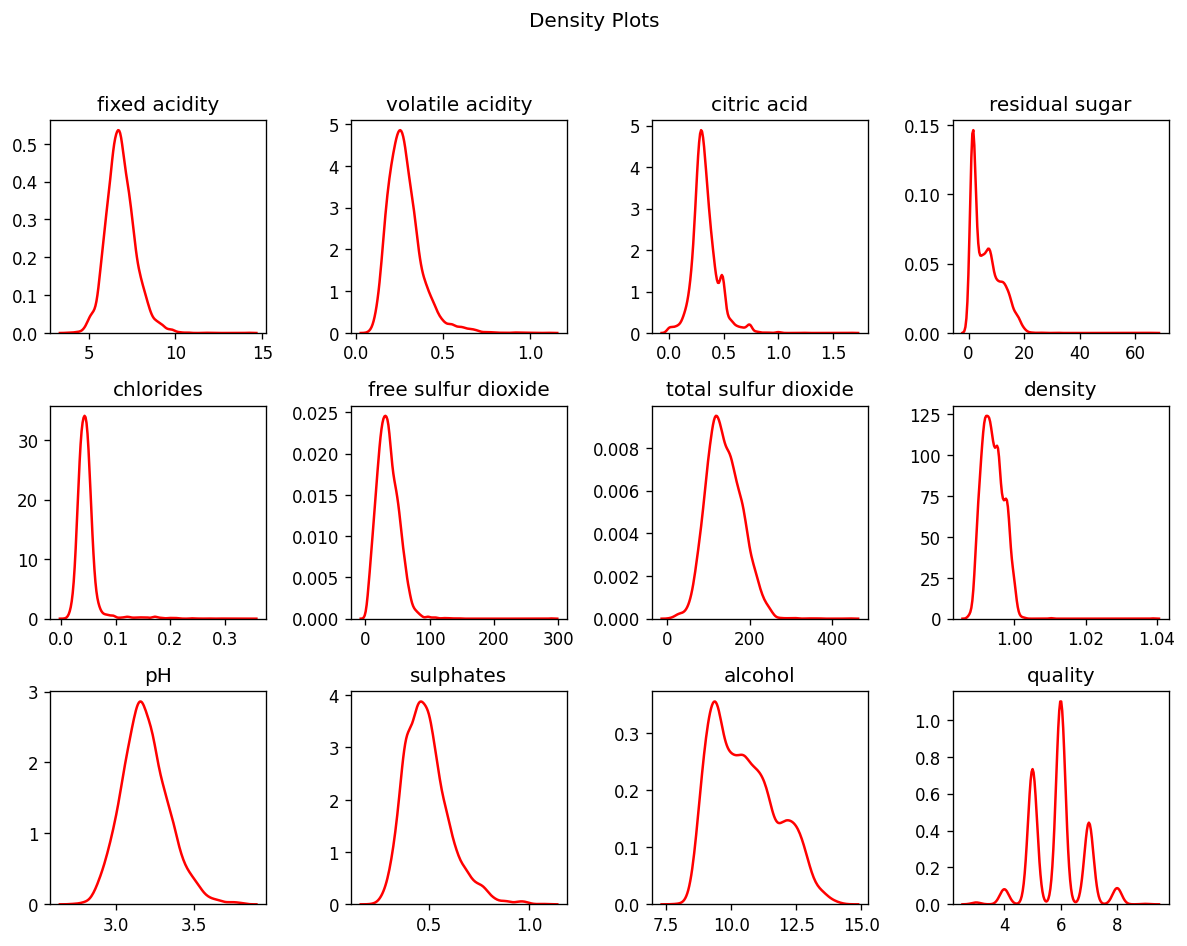

In [10]:
# Define nrows and ncols
nrows=3
ncols=12

# Density Plots
fig, axes = plt.subplots(ncols=(ncols//nrows),nrows=nrows, figsize=(10,8), dpi=120)
for i in range(nrows):
  for j in range(ncols//nrows):
    col_index = i * (ncols//nrows) + j
    column = wines.columns[col_index]
    sns.kdeplot(data=wines, x=column, ax=axes[i,j], color="red")
    axes[i, j].set_title(f'{column}')
    axes[i, j].set_xlabel(None)
    axes[i, j].set_ylabel(None)
plt.suptitle('Density Plots')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("density_plots.png", bbox_inches='tight', dpi=500)
plt.show()

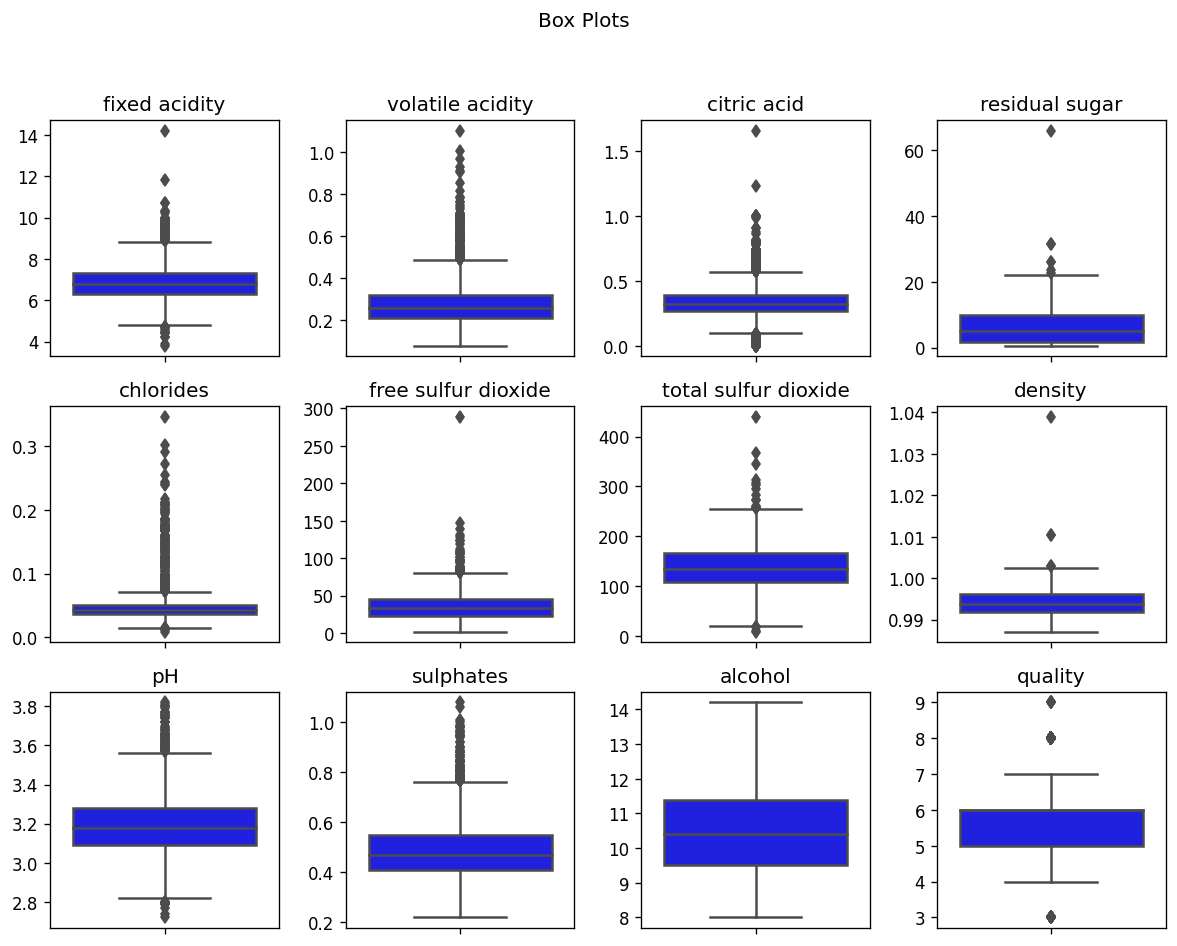

In [11]:
# Define the nrows and ncols
nrows=3
ncols=12

# box and whisker plots
fig, axes = plt.subplots(ncols=(ncols//nrows),nrows=nrows, figsize=(10,8), dpi=120)
for i in range(nrows):
  for j in range(ncols//nrows):
    col_index = i * (ncols//nrows) + j
    column = wines.columns[col_index]
    sns.boxplot(data=wines, y=column, ax=axes[i,j], color="blue")
    axes[i, j].set_title(f'{column}')
    axes[i, j].set_xlabel(None)
    axes[i, j].set_ylabel(None)
plt.suptitle('Box Plots')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("box_plots.png", bbox_inches='tight', dpi=500)
plt.show()

### Multimodal Data Visualisation

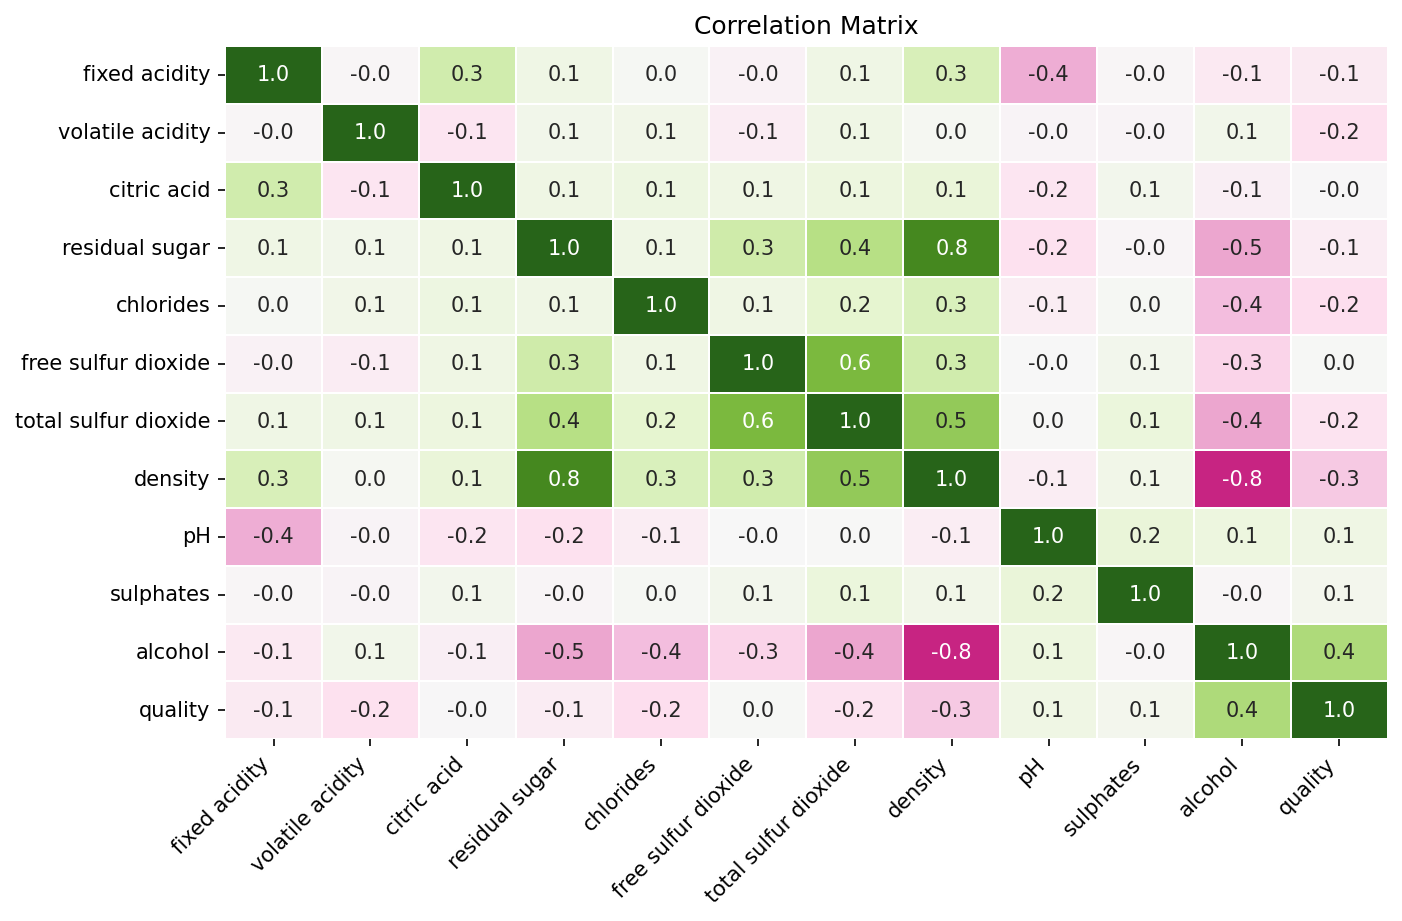

In [12]:
# Create a correlation matrix
corr = wines.corr()

# Show the corr matrix using heatmap
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt=".1f",
            cbar=False, cmap="PiYG", linewidths=0.1)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.savefig("correlation_matrix.png", bbox_inches='tight', dpi=500)
plt.show()

## Test Dataset

It is a good idea to use a test hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. We will use **80%** of the dataset
for modeling and hold back **20%** for test.

In [13]:
# Define features and target
X = wines.drop(["quality"], axis=1)
y = wines["quality"]

# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluate Algorithm: **Baseline**
We don’t know what algorithms will do well on this dataset. Let’s design
our test harness. We will use **10-fold cross validation**. We will evaluate algorithms using the **accuracy**
metric. This is a gross metric that will give a quick idea of how correct a given model is.

Let’s create a baseline of performance on this problem and spot-check a number of different
algorithms. We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:
 * **Linear Algorithms:** Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
 * **Nonlinear Algorithms:** Decision Tree Classifier (DT), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [14]:
# Spot-Check Algorithms
models = []
models.append(("LR", LogisticRegression(max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC()))

In [15]:
# Train the models
results = []
names = []

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
  results.append(cv_results)
  names.append(name)

  print(f"{name}: {np.mean(cv_results):.3f} ({np.std(cv_results):.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.523 (0.0128)
LDA: 0.538 (0.0115)
DT: 0.582 (0.0141)
KNN: 0.468 (0.0095)
NB: 0.442 (0.0194)
SVC: 0.451 (0.0033)


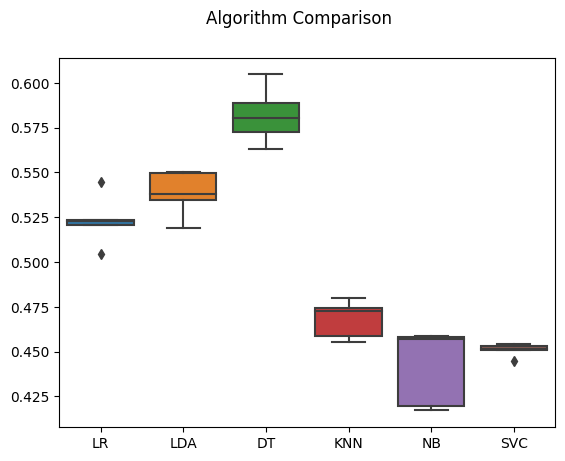

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results, ax=ax)
ax.set_xticklabels(names)
plt.savefig("linear_algorithm_comparison.png", bbox_inches='tight', dpi=500)
plt.show()

## Evaluate Algorithm: Standardize Data

In [17]:
# Standard the dataset
pipelines = []

pipelines.append(("ScaledLR", Pipeline([("sc", StandardScaler()), ("LR", LogisticRegression())])))
pipelines.append(("ScaledLDA", Pipeline([("sc", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN", Pipeline([("sc", StandardScaler()), ("KNN", KNeighborsClassifier())])))
pipelines.append(("ScaledNB", Pipeline([("sc", StandardScaler()), ("NB", GaussianNB())])))
pipelines.append(("ScaledDT", Pipeline([("sc", StandardScaler()), ("DT", DecisionTreeClassifier())])))
pipelines.append(("ScaledSVC", Pipeline([("sc", StandardScaler()), ("SVC", SVC())])))

In [18]:
results = []
names = []

for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

  results.append(cv_results)
  names.append(name)

  print(f"{name}: {np.mean(cv_results):.3f} ({np.std(cv_results):.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ScaledLR: 0.543 (0.0111)
ScaledLDA: 0.538 (0.0115)
ScaledKNN: 0.547 (0.0066)
ScaledNB: 0.440 (0.0196)
ScaledDT: 0.574 (0.0149)
ScaledSVC: 0.572 (0.0081)


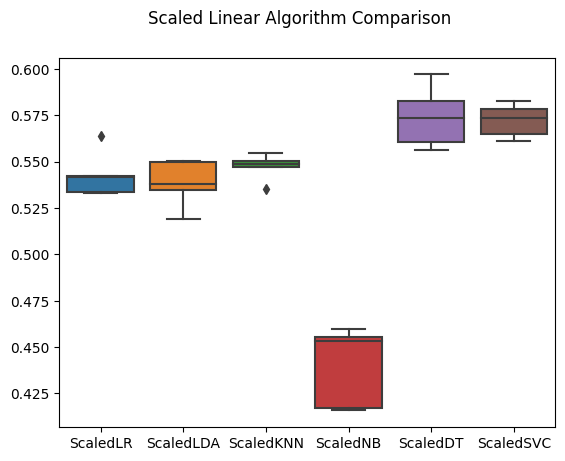

In [19]:
# Compare Scaled Linear Algorithms
fig = plt.figure()
fig.suptitle('Scaled Linear Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results, ax=ax)
ax.set_xticklabels(names)
plt.savefig("scaled_linear_algorithm_comparison.png", bbox_inches='tight', dpi=500)
plt.show()

## Algorithm Tuning

we investigate tuning the parameters for two algorithms that show promise from
the spot-checking in the previous section: **DT** and **SVM**.

### Tuning Decision Tree Classifier

In [20]:
# Tune Scaled Decision Tree
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X_train)

# max_depts
maxdepth = [None, 1,2,3,4,5,6,7,8,9,10,20,30]
param_grid = dict(max_depth = maxdepth)

model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_, grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print(f"{mean:.3f} ({stdev:.4f}) with: {param}")

Best: (0.579884731670446, {'max_depth': 20})
0.579 (0.0148) with: {'max_depth': None}
0.456 (0.0103) with: {'max_depth': 1}
0.523 (0.0076) with: {'max_depth': 2}
0.526 (0.0081) with: {'max_depth': 3}
0.530 (0.0120) with: {'max_depth': 4}
0.534 (0.0077) with: {'max_depth': 5}
0.530 (0.0108) with: {'max_depth': 6}
0.533 (0.0135) with: {'max_depth': 7}
0.539 (0.0095) with: {'max_depth': 8}
0.548 (0.0090) with: {'max_depth': 9}
0.546 (0.0068) with: {'max_depth': 10}
0.580 (0.0161) with: {'max_depth': 20}
0.575 (0.0098) with: {'max_depth': 30}


### Tuning the Support Vector Machine

In [21]:
# Tune Support Vector Classifier
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X_train)

# max_depts
num_c = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernels = ["linear", "poly", "rbf", "sigmoid"]
param_grid = dict(C=num_c, kernel=kernels)

model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_, grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print(f"{mean:.3f} ({stdev:.4f}) with: {param}")

Best: (0.5742741157765788, {'C': 1.3, 'kernel': 'rbf'})
0.525 (0.0099) with: {'C': 0.1, 'kernel': 'linear'}
0.488 (0.0038) with: {'C': 0.1, 'kernel': 'poly'}
0.531 (0.0102) with: {'C': 0.1, 'kernel': 'rbf'}
0.495 (0.0094) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.526 (0.0083) with: {'C': 0.3, 'kernel': 'linear'}
0.512 (0.0096) with: {'C': 0.3, 'kernel': 'poly'}
0.560 (0.0135) with: {'C': 0.3, 'kernel': 'rbf'}
0.476 (0.0146) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.525 (0.0095) with: {'C': 0.5, 'kernel': 'linear'}
0.526 (0.0126) with: {'C': 0.5, 'kernel': 'poly'}
0.565 (0.0086) with: {'C': 0.5, 'kernel': 'rbf'}
0.462 (0.0238) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.525 (0.0095) with: {'C': 0.7, 'kernel': 'linear'}
0.533 (0.0109) with: {'C': 0.7, 'kernel': 'poly'}
0.567 (0.0104) with: {'C': 0.7, 'kernel': 'rbf'}
0.454 (0.0280) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.525 (0.0096) with: {'C': 0.9, 'kernel': 'linear'}
0.536 (0.0128) with: {'C': 0.9, 'kernel': 'poly'}
0.570 (0.0101) with: {'C':

## Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
* **Boosting Methods:** AdaBoost (AB) and Gradient Boosting (GBM).
* **Bagging Methods:** Random Forests (RF) and Extra Trees (ET).

In [22]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
  cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {np.mean(cv_results):.3f} ({np.std(cv_results):.4f})")

AB: 0.459 (0.0148)
GBM: 0.595 (0.0114)
RF: 0.660 (0.0126)
ET: 0.655 (0.0115)


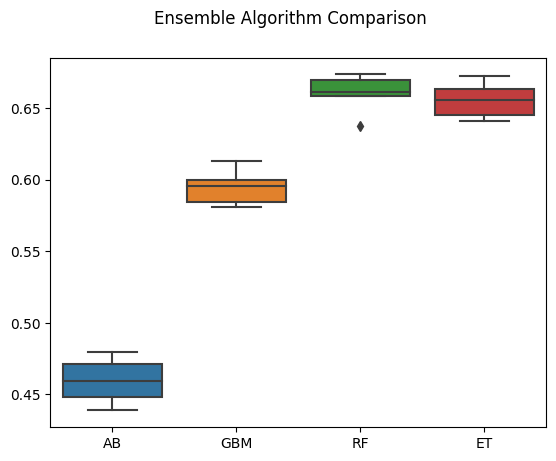

In [23]:
# Compare Ensemble Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results, ax=ax)
ax.set_xticklabels(names)
plt.show()

In [24]:
# creating a pipelines for ensemble algorithms
pipelines = []

pipelines.append(("ScaledAB", Pipeline([("sc", StandardScaler()), ("AB", AdaBoostClassifier())])))
pipelines.append(("ScaledGBM", Pipeline([("sc", StandardScaler()), ("GBM", GradientBoostingClassifier())])))
pipelines.append(("ScaledRF", Pipeline([("sc", StandardScaler()), ("RF", RandomForestClassifier())])))
pipelines.append(("ScaledET", Pipeline([("sc", StandardScaler()), ("ET", ExtraTreesClassifier())])))

In [25]:
results = []
names = []

for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

  results.append(cv_results)
  names.append(name)

  print(f"{name}: {np.mean(cv_results):.3f} ({np.std(cv_results):.4f})")

ScaledAB: 0.459 (0.0148)
ScaledGBM: 0.595 (0.0107)
ScaledRF: 0.657 (0.0100)
ScaledET: 0.657 (0.0064)


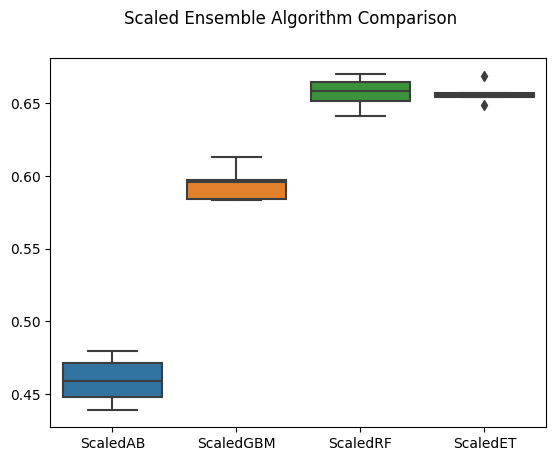

In [26]:
# Compare Ensemble Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(results, ax=ax)
ax.set_xticklabels(names)
plt.show()

### Tuning the RandomForestClassifier

In [27]:
# Tune RandomForestClassifier
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X_train)

param_grid = {'n_estimators':[1,10, 100, 200]}
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=5)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_, grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print(f"{mean:.3f} ({stdev:.4f}) with: {param}")

Best: (0.6625791695988741, {'n_estimators': 200})
0.517 (0.0185) with: {'n_estimators': 1}
0.635 (0.0235) with: {'n_estimators': 10}
0.661 (0.0107) with: {'n_estimators': 100}
0.663 (0.0069) with: {'n_estimators': 200}


## Finalize The Model

In [ ]:
# define a scaler
sc = StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

# Model
model = RandomForestClassifier(n_estimators=100) #Also this is default
model.fit(scaledX_train, y_train)

# Predict
predictions = model.predict(scaledX_test)

In [ ]:
# accuracy score
acc = accuracy_score(predictions, y_test)
acc

0.6979591836734694

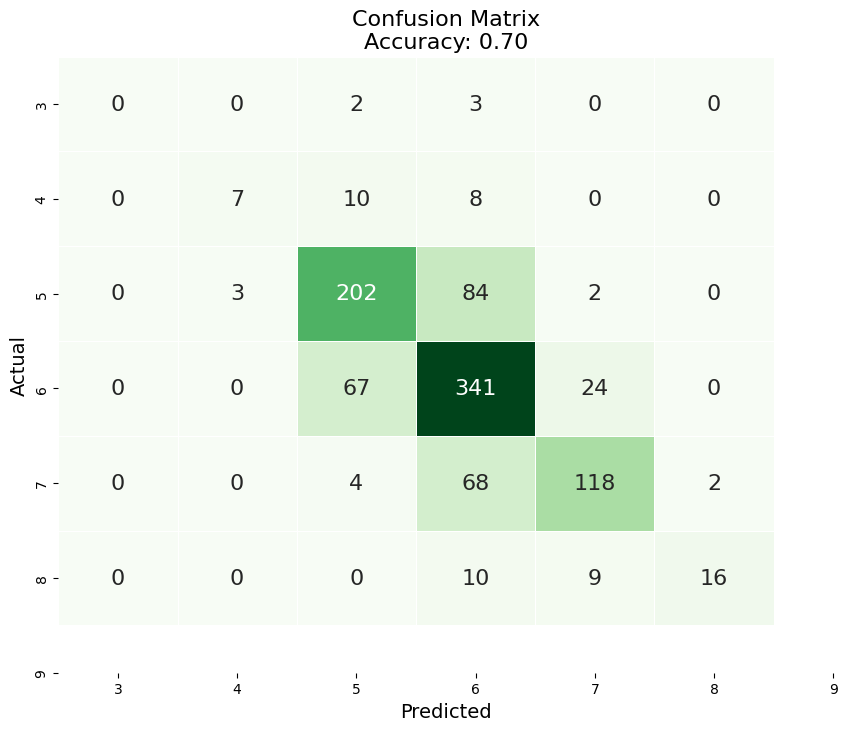

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 16},
            xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)
plt.title(f'Confusion Matrix\nAccuracy: {acc:.2f}', fontsize=16)
plt.xlabel('Predicted', fontsize=14, ha="center")
plt.ylabel('Actual', fontsize=14, ha="center")
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.70      0.28      0.40        25
           5       0.71      0.69      0.70       291
           6       0.66      0.79      0.72       432
           7       0.77      0.61      0.68       192
           8       0.89      0.46      0.60        35

    accuracy                           0.70       980
   macro avg       0.62      0.47      0.52       980
weighted avg       0.70      0.70      0.69       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
!git add .
!git commit -m "with imbalanced data"
!git push origin master

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
